In [7]:
!mkdir historical_data
!aws s3 sync --no-sign-request s3://deutsche-boerse-eurex-pds/ ./historical_data

mkdir: cannot create directory ‘historical_data’: File exists


In [8]:
ls

data10.csv  data-wrangling.ipynb  filenames.txt  historical_data/  lost+found/


In [9]:
!cat filenames.txt

2018-04-05 17:07:12        230 2017-05-27/2017-05-27_BINS_XEUR00.csv
2018-04-05 17:07:12        230 2017-05-27/2017-05-27_BINS_XEUR01.csv
2018-04-05 17:07:12        230 2017-05-27/2017-05-27_BINS_XEUR02.csv
2018-04-05 17:07:12        230 2017-05-27/2017-05-27_BINS_XEUR03.csv
2018-04-05 17:07:12        230 2017-05-27/2017-05-27_BINS_XEUR04.csv
2018-04-05 17:07:12        230 2017-05-27/2017-05-27_BINS_XEUR05.csv
2018-04-05 17:07:12        230 2017-05-27/2017-05-27_BINS_XEUR06.csv
2018-04-05 17:07:12        230 2017-05-27/2017-05-27_BINS_XEUR07.csv
2018-04-05 17:07:12        230 2017-05-27/2017-05-27_BINS_XEUR08.csv
2018-04-05 17:07:12        230 2017-05-27/2017-05-27_BINS_XEUR09.csv
2018-04-05 17:07:12        230 2017-05-27/2017-05-27_BINS_XEUR10.csv
2018-04-05 17:07:12        230 2017-05-27/2017-05-27_BINS_XEUR11.csv
2018-04-05 17:07:12        230 2017-05-27/2017-05-27_BINS_XEUR12.csv
2018-04-05 17:07:12        230 2017-05-27/2017-05-27_BINS_XEUR13.csv
2018-04-05 17:07:12        230 201

In [29]:
import pandas as pd
import boto3
from sagemaker import get_execution_role

In [30]:
role = get_execution_role()
my_bucket = 'bigdatadeutche'
s3 = boto3.resource('s3')

In [32]:
data = pd.read_csv("s3://bigdatadeutche/mergedfiles/*.csv")
data.head()

,ISIN,MarketSegment,UnderlyingSymbol,UnderlyingISIN,Currency,SecurityType,MaturityDate,StrikePrice,PutOrCall,MLEG,ContractGenerationNumber,SecurityID,Date,Time,StartPrice,MaxPrice,MinPrice,EndPrice,NumberOfContracts,NumberOfTrades
0,DE000C0BLY22,FDAX,DAX,DE0008469008,EUR,FUT,20170616.0,NaN,NaN,NaN,NaN,2026646,2017-05-29,06:00,12614.00,12617.00,12609.00,12611.00,167,117
1,DE000C0BLY48,FDXM,DAX,DE0008469008,EUR,FUT,20170616.0,NaN,NaN,NaN,NaN,2026648,2017-05-29,06:00,12609.00,12618.00,12608.00,12611.00,39,31
2,DE000C0BLYQ7,FESX,SX5E,EU0009658145,EUR,FUT,20170616.0,NaN,NaN,NaN,NaN,2026668,2017-05-29,06:00,3569.00,3570.00,3567.00,3567.00,745,62
3,DE000C0BGRF4,FBTP,NaN,NaN,EUR,FUT,20170608.0,NaN,NaN,NaN,NaN,2020211,2017-05-29,06:01,133.92,133.92,133.85,133.88,177,57
4,DE000C0BGRH0,FGBL,NaN,NaN,EUR,FUT,20170608.0,NaN,NaN,NaN,NaN,2020213,2017-05-29,06:01,161.79,161.80,161.72,161.74,1180,124


In [22]:
data.shape

(3230161, 20)

In [23]:
!ls 

data10.csv  data-wrangling.ipynb  filenames.txt  historical_data  lost+found


In [25]:
data_list = []
with open('filenames.txt') as f:
    lines = f.readlines()
    
    data_list = [line.split(" ")[-1] for line in lines]


In [ ]:
len(data_list)

In [ ]:
import pandas as pd
data_1 = [pd.read_csv("historical_data/"+file.replace("\n","")) for file in data_list[:int(0.1*len(data_list))]]

In [ ]:
data_1 = pd.concat(data_1)
data_1.to_csv("data1.csv",index=False)

In [ ]:
data_1 = [pd.read_csv("historical_data/"+file.replace("\n","")) for file in data_list[int(0.1*len(data_list)):int(0.2*len(data_list))]]
data_1 = pd.concat(data_1)
data_1.to_csv("data2.csv",index=False)

In [ ]:
data_1 = [pd.read_csv("historical_data/"+file.replace("\n","")) for file in data_list[int(0.2*len(data_list)):int(0.3*len(data_list))]]
data_1 = pd.concat(data_1)
data_1.to_csv("data3.csv",index=False)

In [ ]:
import boto3

from sagemaker import get_execution_role

role = get_execution_role()

my_bucket = 'bigdatadeutche'

orig_file = 'data1.csv'
dest_file = 'mergedfiles/data1.csv'

s3 = boto3.resource('s3')
s3.Bucket(my_bucket).upload_file(orig_file, dest_file)

In [ ]:
orig_file = 'data2.csv'
dest_file = 'mergedfiles/data2.csv'
s3.Bucket(my_bucket).upload_file(orig_file, dest_file)
orig_file = 'data3.csv'
dest_file = 'mergedfiles/data3.csv'
s3.Bucket(my_bucket).upload_file(orig_file, dest_file)

In [ ]:
!aws s3 ls --no-sign-request s3//bigdatadeutche//

In [ ]:
data_1 = [pd.read_csv("historical_data/"+file.replace("\n","")) for file in data_list[int(0.3*len(data_list)):int(0.4*len(data_list))]]
data_1 = pd.concat(data_1)
data_1.to_csv("data4.csv",index=False)

In [ ]:
data_1 = [pd.read_csv("historical_data/"+file.replace("\n","")) for file in data_list[int(0.4*len(data_list)):int(0.5*len(data_list))]]
data_1 = pd.concat(data_1)
data_1.to_csv("data5.csv",index=False)

In [ ]:
import pandas as pd
data_1 = [pd.read_csv("historical_data/"+file.replace("\n","")) for file in data_list[int(0.5*len(data_list)):int(0.6*len(data_list))]]
data_1 = pd.concat(data_1)
data_1.to_csv("data6.csv",index=False)

In [ ]:
data_1 = [pd.read_csv("historical_data/"+file.replace("\n","")) for file in data_list[int(0.6*len(data_list)):int(0.7*len(data_list))]]
data_1 = pd.concat(data_1)
data_1.to_csv("data7.csv",index=False)

In [ ]:
data_1 = [pd.read_csv("historical_data/"+file.replace("\n","")) for file in data_list[int(0.7*len(data_list)):int(0.8*len(data_list))]]
data_1 = pd.concat(data_1)
data_1.to_csv("data8.csv",index=False)

In [ ]:
import pandas as pd
data_1 = [pd.read_csv("historical_data/"+file.replace("\n","")) for file in data_list[int(0.8*len(data_list)):int(0.9*len(data_list))]]
data_1 = pd.concat(data_1)
data_1.to_csv("data9.csv",index=False)

In [ ]:
data_1 = [pd.read_csv("historical_data/"+file.replace("\n","")) for file in data_list[int(0.9*len(data_list)):int(1.0*len(data_list))]]
data_1 = pd.concat(data_1)
data_1.to_csv("data10.csv",index=False)

In [ ]:
orig_file = 'data4.csv'
dest_file = 'mergedfiles/data4.csv'
s3.Bucket(my_bucket).upload_file(orig_file, dest_file)
orig_file = 'data5.csv'
dest_file = 'mergedfiles/data5.csv'
s3.Bucket(my_bucket).upload_file(orig_file, dest_file)

In [ ]:
import boto3

from sagemaker import get_execution_role

role = get_execution_role()

my_bucket = 'bigdatadeutche'
s3 = boto3.resource('s3')


orig_file = 'data6.csv'
dest_file = 'mergedfiles/data6.csv'
s3.Bucket(my_bucket).upload_file(orig_file, dest_file)

In [ ]:
orig_file = 'data7.csv'
dest_file = 'mergedfiles/data7.csv'
s3.Bucket(my_bucket).upload_file(orig_file, dest_file)

In [ ]:
orig_file = 'data8.csv'
dest_file = 'mergedfiles/data8.csv'
s3.Bucket(my_bucket).upload_file(orig_file, dest_file)

In [ ]:
import boto3

from sagemaker import get_execution_role

role = get_execution_role()

my_bucket = 'bigdatadeutche'
s3 = boto3.resource('s3')

orig_file = 'data9.csv'
dest_file = 'mergedfiles/data9.csv'
s3.Bucket(my_bucket).upload_file(orig_file, dest_file)

In [ ]:
orig_file = 'data10.csv'
dest_file = 'mergedfiles/data10.csv'
s3.Bucket(my_bucket).upload_file(orig_file, dest_file)

In [ ]:
import pandas as pd

data = pd.read_csv("data10.csv")
data.head()

In [42]:
data.shape

(3230161, 20)

In [43]:
data.columns

Index(['ISIN', 'MarketSegment', 'UnderlyingSymbol', 'UnderlyingISIN',
       'Currency', 'SecurityType', 'MaturityDate', 'StrikePrice', 'PutOrCall',
       'MLEG', 'ContractGenerationNumber', 'SecurityID', 'Date', 'Time',
       'StartPrice', 'MaxPrice', 'MinPrice', 'EndPrice', 'NumberOfContracts',
       'NumberOfTrades'],
      dtype='object')

In [44]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [45]:
le = LabelEncoder()
columns = ['ISIN', 'MarketSegment', 'UnderlyingSymbol', 'UnderlyingISIN',
       'Currency', 'SecurityType', 'MaturityDate', 'PutOrCall',
       'MLEG', 'ContractGenerationNumber', 'SecurityID', 'Date', 'Time', 'NumberOfContracts',
       'NumberOfTrades'] #, 'verification_income_joint'
for col in columns:
    data[col] = le.fit_transform(data[col])

In [46]:
data.head

<bound method NDFrame.head of           ISIN  MarketSegment  UnderlyingSymbol  UnderlyingISIN  Currency  \
0        18047            288               113             217         1   
1        18049            291               113             217         1   
2        18069            311               479             291         1   
3        17941            280               582             583         1   
4        17943            318               582             583         1   
...        ...            ...               ...             ...       ...   
3230156  24286            294               484             302         1   
3230157  24314            392               454              58         0   
3230158  27118            421               550             222         1   
3230159  28036            421               550             222         1   
3230160  28075            421               550             222         1   

         SecurityType  MaturityDate  StrikePr

In [ ]:
data.dropna()

In [47]:
import pandas as pd

In [48]:
corr = data.corr()

In [49]:
corr

,ISIN,MarketSegment,UnderlyingSymbol,UnderlyingISIN,Currency,SecurityType,MaturityDate,StrikePrice,PutOrCall,MLEG,ContractGenerationNumber,SecurityID,Date,Time,StartPrice,MaxPrice,MinPrice,EndPrice,NumberOfContracts,NumberOfTrades
ISIN,1.000000,0.039731,0.020969,0.083613,0.115439,0.025066,0.101333,-0.088278,-0.010641,-0.000231,-0.031096,-0.287759,-0.025273,0.031205,-0.023305,-0.023306,-0.023304,-0.023306,-0.007668,-0.010294
MarketSegment,0.039731,1.000000,-0.187036,-0.022462,0.439411,0.675427,-0.197693,0.103622,-0.608430,0.151968,-0.723652,0.123757,0.020755,0.041415,-0.309431,-0.309433,-0.309429,-0.309431,-0.159774,-0.221314
UnderlyingSymbol,0.020969,-0.187036,1.000000,0.247378,-0.436742,-0.584334,0.143964,-0.092383,0.540224,-0.120044,0.586703,-0.130368,-0.028581,-0.078880,-0.199493,-0.199496,-0.199489,-0.199493,0.214527,0.087363
UnderlyingISIN,0.083613,-0.022462,0.247378,1.000000,0.502901,-0.133616,-0.114396,-0.381906,0.124880,-0.024696,0.071334,-0.093448,-0.033640,0.125842,-0.334381,-0.334384,-0.334378,-0.334381,0.120337,0.095684
Currency,0.115439,0.439411,-0.436742,0.502901,1.000000,0.412380,-0.255795,-0.381306,-0.374109,0.095134,-0.479086,0.014045,-0.009549,0.222324,-0.199556,-0.199558,-0.199554,-0.199557,-0.109194,-0.082260
SecurityType,0.025066,0.675427,-0.584334,-0.133616,0.412380,1.000000,-0.036200,NaN,-0.876103,0.019215,-0.953754,0.312652,0.032407,0.005872,-0.403057,-0.403059,-0.403055,-0.403057,-0.197131,-0.295009
MaturityDate,0.101333,-0.197693,0.143964,-0.114396,-0.255795,-0.036200,1.000000,-0.017346,0.152273,-0.658358,0.203770,0.483344,0.466603,-0.041124,-0.034728,-0.034731,-0.034724,-0.034728,0.012351,-0.053657
StrikePrice,-0.088278,0.103622,-0.092383,-0.381906,-0.381306,NaN,-0.017346,1.000000,-0.003553,NaN,-0.217726,0.080054,0.022815,-0.172458,0.362556,0.362681,0.362462,0.362585,-0.001904,-0.160556
PutOrCall,-0.010641,-0.608430,0.540224,0.124880,-0.374109,-0.876103,0.152273,-0.003553,1.000000,-0.193322,0.868751,-0.189339,-0.035066,-0.006326,0.337623,0.337625,0.337621,0.337623,0.176749,0.246972
MLEG,-0.000231,0.151968,-0.120044,-0.024696,0.095134,0.019215,-0.658358,NaN,-0.193322,1.000000,-0.210457,-0.612946,0.057665,0.018616,0.074886,0.074885,0.074887,0.074886,-0.017847,0.048958


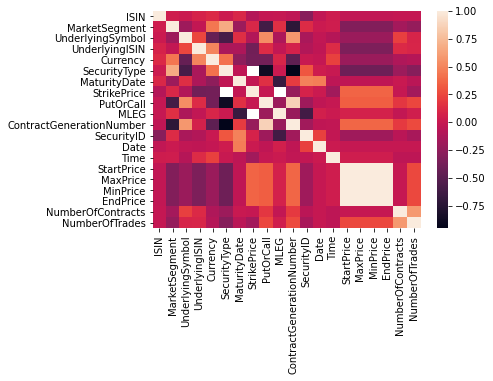

In [50]:
import seaborn as sn
import matplotlib.pyplot as plt
#plt.figure(figsize=(10, 5), dpi=1000)
sn.heatmap(corr, annot = False)
plt.show()

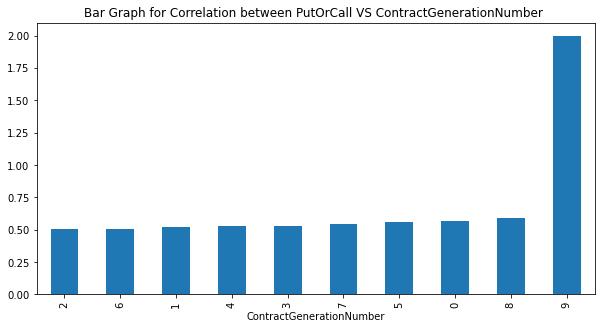

In [51]:
plt.figure(figsize=(10,5))
data.groupby('ContractGenerationNumber')['PutOrCall'].mean().sort_values().plot(kind='bar')
plt.title('Bar Graph for Correlation between PutOrCall VS ContractGenerationNumber ')
plt.show()

/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


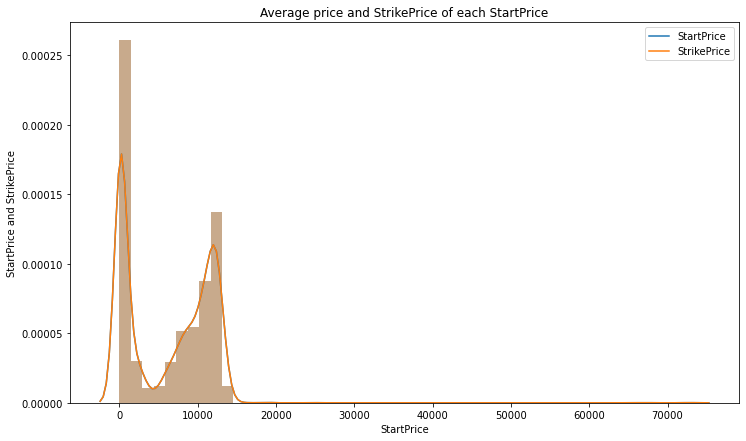

In [52]:
plt.figure(figsize=(12,7))
sn.distplot(data.groupby('StartPrice')['StrikePrice'].mean().sort_values())
sn.distplot(data.groupby('StartPrice')['StrikePrice'].mean().sort_values())
plt.title('Average price and StrikePrice of each StartPrice')
plt.xlabel("StartPrice")
plt.ylabel("StartPrice and StrikePrice")
plt.legend(['StartPrice', 'StrikePrice'])
plt.show()

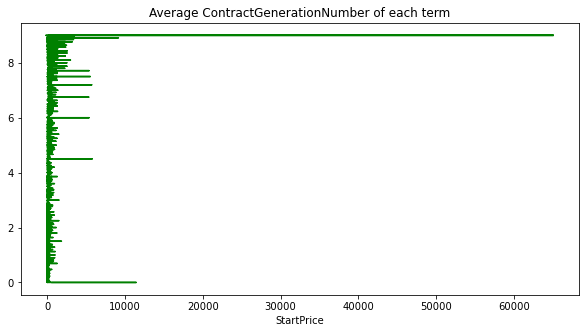

In [55]:
plt.figure(figsize=(10,5))
data.groupby('StartPrice')['ContractGenerationNumber'].mean().sort_values().plot( color='g')
plt.title('Average ContractGenerationNumber of each term')
plt.show()

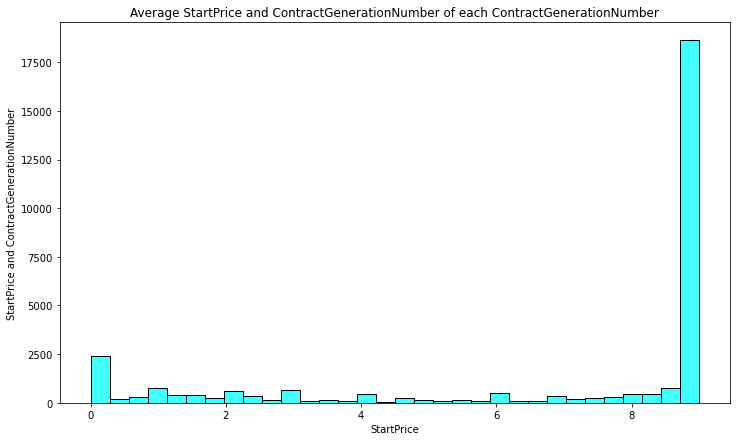

In [61]:
plt.figure(figsize=(12,7))
sn.histplot(data.groupby('StartPrice')['ContractGenerationNumber'].mean().sort_values(), color='cyan')
plt.title('Average StartPrice and ContractGenerationNumber of each ContractGenerationNumber')
plt.xlabel("StartPrice")
plt.ylabel("StartPrice and ContractGenerationNumber")
plt.show()

In [ ]:
data10.to_csv("data10.csv",index=False)

In [ ]:


orig_file = 'data10.csv'
dest_file = 'mergedfiles/data10.csv'
s3.Bucket(my_bucket).upload_file(orig_file, dest_file)